# Chemical unfolding

## __<font color=blue>Introduction</font>__
---

Proteins exist in equilibrium between __<font color=red>native (N) and unfolded (U) states</font>__. For the simplest mechanism by which a monomeric protein unfolds in a two-state process (without intermediates), this can be written as: 

$$
N \rightleftharpoons U .
$$

The thermodynamic stability of a protein is described by __<font color=red>the Gibbs free energy of unfolding, $\Delta G^0_u$</font>__ for the protein:

$$
\Delta G^0_u = - R T ln(K_u) ,
$$

with $\frac{[U]_{eq}}{[N]_{eq}} =$ __<font color=red>$K_u$, the unfolding equilibrium constant</font>__, $R$ the gas constant (8.314 J K$^{-1}$ mol$^{-1}$) and $T$ the absolute temperature (in K). 

Under physiological conditions, for most proteins, the unfolded state accounts for less than 0.01 % of the total protein. In order to detect the unfolded state and determine the Gibbs free energy of unfolding, we need to perturb the equilibrium using chemical and / or thermal denaturation.

In this notebook, we analyze and interpret data from a chemical equilibrium unfolding experiment in order to calculate the Gibbs free energy of unfolding, revealing the stability of the protein's native conformation.

## __<font color=blue>Data</font>__
---

Get the data needed for this exercise [here](https://github.com/renee-85/PythonForBIOC0029/tree/master/data).

The spreadsheet "ChemicalUnfoldingAssay.xlsx" contains one sheet _(see figure below)_. The data describe the chemical denaturation of hen egg white lysozyme with guanidine hydrochloride ($[GdnHCl]$ in M) monitored via circular dichrosim (ellipticity $\epsilon$ in mdeg) spectroscopy are from _Fiedler S, Keller S, and Cole L. (2011). Protein Stability by Chemical Denaturation. Chirascan Series Application Note. Applied Photophysics Ltd_. There are 30 data points.

```{image} ./Images/ChemicalUnfoldingExcelFile.png
:alt: Chemical unfolding assay data
:width: 600px
:align: center
```

## __<font color=blue>Data analysis</font>__
---

```{exercise}
:label: myexample5-exercise1

Import the libraries needed. Use convenient naming.
```

````{solution} myexample5-exercise1
:label: myexample5-solution1
:class: dropdown

```{code-block} python
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
```
````

```{exercise}
:label: myexample5-exercise2

Read in the data containing $[GdnHCl] (M)$ and $\epsilon_{222nm} (mdeg)$ into a Python pandas DataFrame.
```

````{solution} myexample5-exercise2
:label: myexample5-solution2
:class: dropdown

Here's one possible solution.

```{code-block} python
#Read the Excel file
dfCU = pd.read_excel ('../data/ChemicalUnfoldingAssay.xlsx',   #create a pandas DataFrame from the filename with file path and extension shown
                    sheet_name=0,   #use the first sheet (no need to specifically include this as we use the default setting)
                    header=0)   #our data has column names

print(dfCU)   #print the DataFrame created
```
````

```{exercise}
:label: myexample5-exercise3

Plot the data: $[GdnHCl] (M)$ versus $\epsilon_{222nm} (mdeg)$.

Inspect and interpret the data:
- Do we discern a clear trend in our data? What does it represent?
- Do we have outliers?
```

````{solution} myexample5-exercise3
:label: myexample5-solution3
:class: dropdown

Here's one possible solution.

```{code-block} python
#Plot the data
plt.figure(figsize=(7,5))   #start a figure object

plt.plot(dfCU.iloc[:,0], dfCU.iloc[:,1],   #plot a set of x (= [GdnHCl], i.e. column 1),y (= epsilon), i.e. column 2) data points
         marker='o', color='gray', markersize=8, linestyle='None',   #use a round, gray marker with size 8; use no line
         label='Data')   #add a legend label
       
plt.title('Chemical unfolding', fontsize=18)   #title of graph
plt.xlabel('$[GdnHCl] (M)$', fontsize=14)   #X-axis label
plt.ylabel('$\epsilon_{222nm} (mdeg)$', fontsize=14)   #Y-axis label
plt.axis([-0.1, 6.5, -15.5, -2.5])   #axis boundaries, in this case from -0.1 to 6.5 for the X-axis and -15.5 to -2.5 for the Y-axis
plt.legend(loc='lower right')   #show legend in lower right corner

plt.show()   #show the figure object
```

The denaturation curve shows a sigmoidal, cooperative transition from the native to the denatured state. We can distinguish three regions _(see figure below)_:

```{image} ./Images/ChemicalUnfoldingRegions.png
:alt: Chemical unfolding curve regions
:width: 600px
:align: center
```

1. between 0 and ~ 2.5 M GdnHCl: __<font color=red>the pre-transition region</font>__, in which $\epsilon_{222nm}$ changes slowly with denaturant concentration, shows the dependence of the native state on the GdnHCl concentration;
2. between ~ 2.5 and ~ 4 M GdnHCl: __<font color=red>the transition region</font>__, which shows major variation in $\epsilon_{222nm}$, represents a mixture of the native and the unfolded states;
3. between ~ 4 and 6 M GdnHCl: __<font color=red>the post-transition region</font>__ with slow variations in $\epsilon_{222nm}$ and where the unfolded ensemble is largely populated.

Of note, a biphasic denaturation curve is typical for a three-state unfolding mechanism: the native protein unfolds through a partially structured intermediate before completely unfolding ($N \rightleftharpoons I \rightleftharpoons U$). Dimer unfolding gets even more complicated. See _Walters J, Milam SL, and Clark AC. (2009). Practical Approaches to Protein Folding and Assembly: Spectroscopic Strategies in Thermodynamics and Kinetics. Methods Enzymol. (455, 1-39)_ for a complete description.

No data points are spotted as clear outliers.
````

```{exercise}
:label: myexample5-exercise4

Define the function to fit the data. Use 

$$
Y = \frac{(Y'_{n} + m_n [GdnHCl]) + (Y'_{u} + m_u [GdnHCl])  exp(- \frac{(\Delta G^0_u(0) + m [GdnHCl])}{RT})}
{1 + exp(- \frac{(\Delta G^0_u(0) + m [GdnHCl])}{RT})} ,
$$

as first described by _Santoro MM, and Bolen DW. (1988). Unfolding free energy changes determined by the linear extrapolation method. 1. Unfolding of phenylmethanesulfonyl a-chymotrypsin using different denaturants. Biochem. (27, 8063–8068)_. Here,
- $Y'_{n}$ and $Y'_{u}$ are the signal of the native and unfolded states in the absence of GdnHCl,
- $m_n$ and $m_u$ account for changes in the signals of the pre- and post-transition regions with changes in the GdnHCl concentration, and
- $m$ is a measure of cooperativity of the unfolding transition. It is proportional to the change in the solvent-accessible surface area ($\Delta SASA$) when going from the native to the denatured conformation

Define the variable $temp$, the temperature in &deg;C, outside of the function (this is called a __global variable__, see [here](https://www.w3schools.com/python/python_variables_global.asp) for more information). We know from the experimental details (see above), that in this experiment the temperature, $t$, is 20 &deg;C.
```

````{solution} myexample5-exercise4
:label: myexample5-solution4
:class: dropdown

Here's one possible solution.

```{code-block} python
#Define the temperature
temp = 20

#Define the chemical unfolding function
def chemicalunfolding(x, yn, mn, yu, mu, DGu, m):
    return ((yn + mn * x) + (yu + mu * x) * np.exp(-((DGu + m * x) / (8.314 * (273.15 + temp))))) / (1 + np.exp(-((DGu + m * x) / (8.314 * (273.15 + temp)))))
```
````

```{exercise}
:label: myexample5-exercise5

Find and test initial guesses for the fitting parameters.
```

````{solution} myexample5-exercise5
:label: myexample5-solution5
:class: dropdown

We get initial guesses for $Y'_{n}$, $Y'_{u}$, $m_n$, and $m_u$ from our graph _(see figure below)_. I usually start with an $m$-value around -5 kJ mol$^{-1}$ K$^{-1}$ and a $\Delta G^0_u(0)$-value around 20 kJ mol$^{−1}$.

```{image} ./Images/ChemicalUnfoldingInitialGuesses.png
:alt: Chemical unfolding curve regions
:width: 600px
:align: center
```

Here's one possible solution.

```{code-block} python
#Create a list of GdnHCl concentrations as input for the function
GdnHClin=np.linspace(0, 10, 100)

#Test the initial guesses for the fitting parameters
plt.figure(figsize=(7,5))   #start a figure object

plt.plot(dfCU.iloc[:,0], dfCU.iloc[:,1],   #plot a set of x (= [GdnHCl], i.e. column 1),y (= epsilon), i.e. column 2) data points
         marker='o', color='gray', markersize=8, linestyle='None',   #use a round, gray marker with size 8; use no line
         label='Data')   #add a legend label

plt.plot(GdnHClin, chemicalunfolding(GdnHClin, -15, 0, -4, 0.1, 20000, -5000), #Test my guesses for the initial parameters. Use the generated GdnHCl array between 0 and 10 as x-values.
         color="red", linestyle='solid',   #use red, solid line
         label='Guesses')   #add a legend label
         
plt.title('Chemical unfolding', fontsize=18)   #title of graph
plt.xlabel('$[GdnHCl] (M)$', fontsize=14)   #X-axis label
plt.ylabel('$\epsilon_{222nm} (mdeg)$', fontsize=14)   #Y-axis label
plt.axis([-0.1, 6.5, -15.5, -2.5])   #axis boundaries, in this case from -0.1 to 6.5 for the X-axis and -15.5 to -2.5 for the Y-axis
plt.legend(loc='lower right')   #show legend in lower right corner

plt.show()   #show the figure object
```

Looks ok!
````

```{exercise}
:label: myexample5-exercise6

Fit the data. Report the fit parameters and standard errors on the fit parameters.
```

````{solution} myexample5-exercise6
:label: myexample5-solution6
:class: dropdown

Here's one possible solution.

```{code-block} python
#Fit the data with the chemical unfolding curve
paramsCU, params_covCU = curve_fit(chemicalunfolding,   #the line function we try to fit to the data
                                          dfCU.iloc[:,0],   #the x values
                                          dfCU.iloc[:,1],   #the y values
                                          [-15, 0, -4, 0.1, 20000, -5000]) #my guesses for the initial parameters

#Report the fit parameters with standard errors for the line function
print("Yn = ", paramsCU[0], "±", np.sqrt(np.diag(params_covCU))[0])
print("Yu = ", paramsCU[2], "±", np.sqrt(np.diag(params_covCU))[2])
print("mn = ", paramsCU[1], "±", np.sqrt(np.diag(params_covCU))[1])
print("mu = ", paramsCU[3], "±", np.sqrt(np.diag(params_covCU))[3])
print("DGu = ", paramsCU[4], "±", np.sqrt(np.diag(params_covCU))[4])
print("m = ", paramsCU[5], "±", np.sqrt(np.diag(params_covCU))[5])
```

We can see that the $m$-value is -10.1 $\pm$ 0.3 kJ mol$^{-1}$ K$^{-1}$ and $\Delta G^0_u(0)$ is 32.3 $\pm$ 0.8 kJ mol$^{-1}$.
````

```{exercise}
:label: myexample5-exercise7

Calculate the residuals and produce a combined figure showing the residuals plot underneath the main plot with data and fitted curve. Make sure they are aligned and have the same X-axis so we can see which residual corresponds to which data point.

__Inspect the quality of the fit!__

- Look at the graph of the experimental data and the fitted curve  Do the experimental data and model match?
- Look at the graph of the residuals. Are they around 0? Are they random or is there a trend? If the residuals display a systematic pattern, the model fits the data poorly.
- Look at the fit parameters and the standard errors on the fit parameters. Are the fit parameters within (biological) reason? Are the standard errors on the fit parameters small? If a standard error on a fit parameter is bigger than the fit parameter, it is possible that there are not enough data points or that the model fits the data poorly.
- Look at the goodness of fit statistics. For example, the value of R-square ranges from 0 (worst possible fit) to 1 (best possible fit). However, these fit statistics are not readily available as output of the SciPy curve_fit() function...
```

````{solution} myexample5-exercise7
:label: myexample5-solution7
:class: dropdown

Here's one possible solution.

```{code-block} python
#Calculate the residuals
resid = dfCU.iloc[:,1] - chemicalunfolding(dfCU.iloc[:,0], *paramsCU)   #calculate the residuals, the star in _*paramsCU_ unpacks the array so the optimized parameter values become the arguments (after the x-values) to the function

#Produce a combined graph
fig = plt.figure()   #to create a figure object

xlimits = [-0.1, 6.1]   #to make sure we use the same of the X-axis boundaries for both plots

ax1 = fig.add_axes([0.1, 0.53, 1, 0.81])   #to specify the coordinates, width and height of the top plot

ax2 = fig.add_axes([0.1, 0.1, 1, 0.4])   #to specify the coordinates, width and height of the bottom plot

ax1.plot(dfCU.iloc[:,0], dfCU.iloc[:,1],   #plot a set of x (= [GdnHCl], i.e. column 1),y (= epsilon), i.e. column 2) data points
         marker='o', color='gray', markersize=8, linestyle='None',   #use a round, gray marker with size 8; use no line
         label='Data')   #add a legend label

ax1.plot(GdnHClin, chemicalunfolding(GdnHClin, *paramsCU),   #Add the fitted line to plot. Use the generated GdnHCl array between 0 and 10 as x-values. Use the fitted parameters to calculate the y-values. The star in _*paramsCU_ unpacks the array so the optimized parameter values become the arguments (after the x-values) to the function.
         color="gray", linestyle='-',   #use a gray, solid line
         label='Fit')   #add a legend label

ax1.axis(xlimits + [-15.5, -2.5])   #sets the X-axis and Y-axis boundaries for the top plot
ax1.tick_params(axis='x', bottom=False, labelbottom=False)   #removes the ticks and tick labels on the X-axis for the top plot
ax1.set_ylabel('$\epsilon_{222nm} (mdeg)$')   #adds Y-axis title for the top plot
ax1.legend(loc='upper left')   #include legend

ax2.plot(dfCU.iloc[:,0], resid,   #plot a set of x (= [GdnHCl]),y (= the residuals) data points
         marker='o', color='gray', linestyle='None', markersize=8)   #use gray datapoints size 8 and no line
         
ax2.axhline(0, color='gray', linestyle="--")   #adds a horizontal line at y=0
ax2.axis(xlimits + [-0.3,0.3])   #sets the X-axis and Y-axis boundaries (needs some trial and error to find the right ones!) for the bottom plot
ax2.set_xlabel('$[GdnHCl] (M)$')   #adds X-axis title for the bottom plot, which is the same for the top plot
ax2.set_ylabel('Residuals')   #adds Y-axis title for the bottom plot

plt.show()   #show the figure object
```

All in all the fit looks good. There seems to be no trend in the residuals. The fit paramaters are within (biological) reason. The standard errors are not bigger than the fit parameters. 
````

## __<font color=blue>Let's dive deeper into the topic: the unfolding parameters</font>__
---

The previous equation, _i.e._:

$$
Y = \frac{(Y_{n'} + m_n [GdnHCl]) + (Y_{u'} + m_u [GdnHCl])  exp (- \frac{(\Delta G^0_u(0) + m [GdnHCl])}{RT})}
{1 + exp (- \frac{(\Delta G^0_u(0) + m [GdnHCl])}{RT})} ,
$$

can be used to demonstrate the effects of the $m$-value and $\Delta G^0_u(0)$ on unfolding transitions.

Increasing the value of $\Delta G^0_u(0)$ (10, 20 and 40 kJ mol$^{-1}$, see the first graph) with a constant value of $m$ (set to -5 kJ mol$^{-1}$ M$^{-1}$) shifts the transition midpoint to higher values, but leaves the shape of the curve unchanged. The larger $\Delta G^0_u(0)$, the more stable the protein, and the more denaturant we need to unfold the protein.

This is demonstrated with the code (and graph) below:

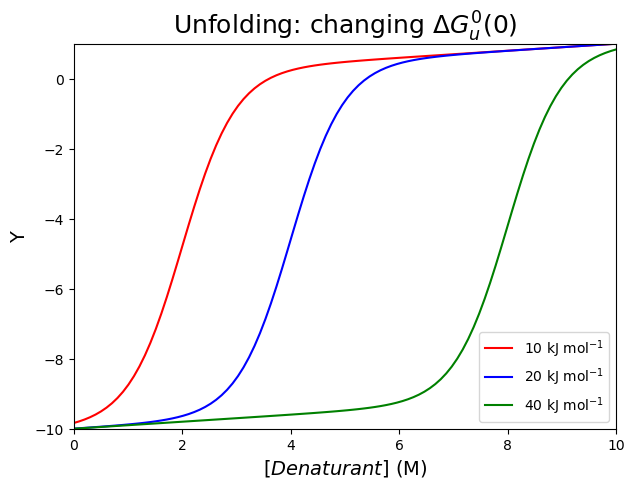

In [1]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

#Define the temperature
temp = 20

#Define the chemical unfolding function
def chemicalunfolding(x, yn, mn, yu, mu, DGu, m):
    return ((yn + mn * x) + (yu + mu * x) * np.exp(-((DGu + m * x) / (8.314 * (273.15 + temp))))) / (1 + np.exp(-((DGu + m * x) / (8.314 * (273.15 + temp)))))

#Create a list of GdnHCl concentrations as input for the function
GdnHClin=np.linspace(0, 10, 100)

#Simulate the graphs
plt.figure(figsize=(7,5))
plt.plot(GdnHClin, chemicalunfolding(GdnHClin, -10, 0.1, 0, 0.1, 10000, -5000), color="red",  label='10 kJ mol$^{-1}$')
plt.plot(GdnHClin, chemicalunfolding(GdnHClin, -10, 0.1, 0, 0.1, 20000, -5000), color="blue", label='20 kJ mol$^{-1}$')
plt.plot(GdnHClin, chemicalunfolding(GdnHClin, -10, 0.1, 0, 0.1, 40000, -5000), color="green", label='40 kJ mol$^{-1}$')
plt.legend(loc='lower right')
plt.title('Unfolding: changing $\Delta G^0_u(0)$', fontsize=18)
plt.xlabel('$[Denaturant]$ (M)', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.axis([0, 10, -10, 1])
plt.show()

Increasing the $m$-value (-10, -5.0 and -2.5 kJ mol$^{-1}$ M$^{-1}$) with a constant value of $\Delta G^0_u(0)$ (set to 20 kJ mol$^{-1}$) decreases the slope of the transition, but also increases the transition midpoint.

This is demonstrated with the code (and graph) below:

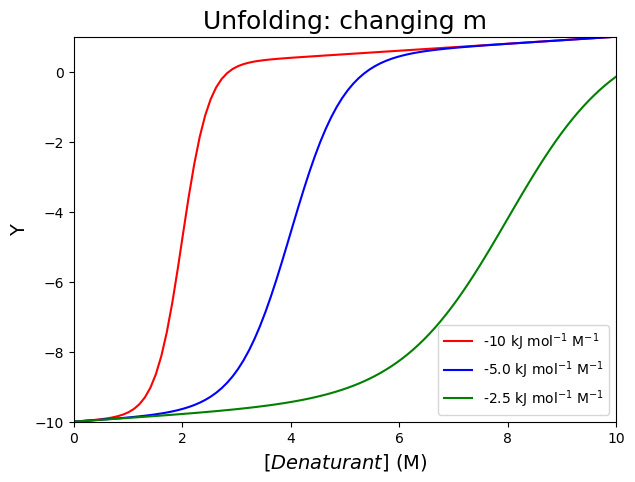

In [3]:
plt.figure(figsize=(7,5))
plt.plot(GdnHClin, chemicalunfolding(GdnHClin, -10, 0.1, 0, 0.1, 20000, -10000), color="red",  label='-10 kJ mol$^{-1}$ M$^{-1}$')
plt.plot(GdnHClin, chemicalunfolding(GdnHClin, -10, 0.1, 0, 0.1, 20000, -5000), color="blue", label='-5.0 kJ mol$^{-1}$ M$^{-1}$')
plt.plot(GdnHClin, chemicalunfolding(GdnHClin, -10, 0.1, 0, 0.1, 20000, -2500), color="green", label='-2.5 kJ mol$^{-1}$ M$^{-1}$')
plt.legend(loc='lower right')
plt.title('Unfolding: changing m', fontsize=18)
plt.xlabel('$[Denaturant]$ (M)', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.axis([0, 10, -10, 1])
plt.show()

To hold the transition midpoint constant, $\Delta G^0_u(0)$ must increase in proportion to the $m$-value.

This is demonstrated with the code (and graph) below:

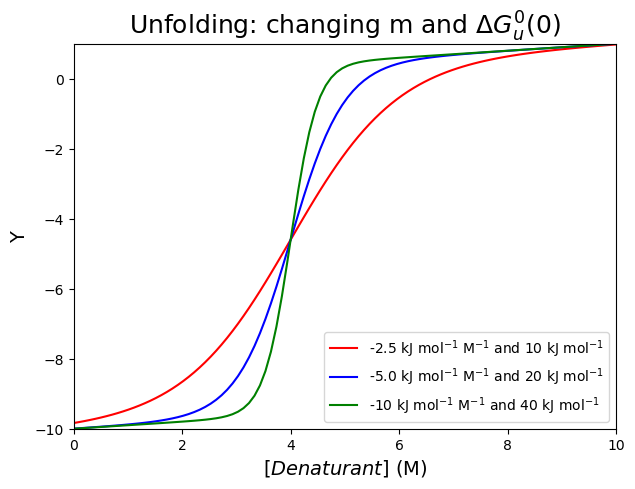

In [4]:
plt.figure(figsize=(7,5))
plt.plot(GdnHClin, chemicalunfolding(GdnHClin, -10, 0.1, 0, 0.1, 10000, -2500), color="red",  label='-2.5 kJ mol$^{-1}$ M$^{-1}$ and 10 kJ mol$^{-1}$')
plt.plot(GdnHClin, chemicalunfolding(GdnHClin, -10, 0.1, 0, 0.1, 20000, -5000), color="blue", label='-5.0 kJ mol$^{-1}$ M$^{-1}$ and 20 kJ mol$^{-1}$')
plt.plot(GdnHClin, chemicalunfolding(GdnHClin, -10, 0.1, 0, 0.1, 40000, -10000), color="green", label='-10 kJ mol$^{-1}$ M$^{-1}$ and 40 kJ mol$^{-1}$')
plt.legend(loc='lower right')
plt.title('Unfolding: changing m and $\Delta G^0_u(0)$', fontsize=18)
plt.xlabel('$[Denaturant]$ (M)', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.axis([0, 10, -10, 1])
plt.show()